In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
INPUT_FILE = './Data/sales_data.csv'
SUMMARY_FILE = './Data/sales_summary.txt'

In [6]:
def analyze_sales_data(file_path):
    try:
        # Load the CSV file using pandas
        df = pd.read_csv(file_path, parse_dates=['Date'],encoding="latin-1")       
        print(f"Successfully loaded data from {file_path}. Total rows: {len(df)}")

        # Calculate the total revenue
        total_revenue = df['Revenue ($)'].sum()

        # Find the best-selling product (based on Quantity Sold)
        product_sales = df.groupby('Product')['Quantity Sold'].sum()
        
        # idxmax() finds the index (Product name) corresponding to the maximum value
        best_selling_product = product_sales.idxmax()
        best_selling_quantity = product_sales.max()

        # Identify the day with the highest sales (based on Revenue)
        daily_revenue = df.groupby('Date')['Revenue ($)'].sum()
        
        # idxmax() finds the index (Date) corresponding to the maximum value
        highest_sales_day = daily_revenue.idxmax().strftime('%Y-%m-%d')
        highest_daily_revenue = daily_revenue.max()

        # Prepare the summary insights text
        summary_text = (
            f"SALES SUMMARY REPORT\n"
            f"----------------------------------------\n"
            f"1. Total Revenue: ${total_revenue:,.2f}\n"
            f"2. Best-Selling Product:\n"
            f"   - Product: {best_selling_product}\n"
            f"   - Total Quantity Sold: {best_selling_quantity} units\n"
            f"3. Highest Sales Day:\n"
            f"   - Date: {highest_sales_day}\n"
            f"   - Revenue: ${highest_daily_revenue:,.2f}\n"
            f"----------------------------------------"
        )
        
        return summary_text, daily_revenue

    except FileNotFoundError:
        return f"Error: The file '{file_path}' was not found. Please ensure it exists.", None
    except Exception as e:
        return f"An error occurred during analysis: {e}", None

Successfully loaded data from ./Data/sales_data.csv. Total rows: 10
SALES SUMMARY REPORT
----------------------------------------
1. Total Revenue: $23,950.00
2. Best-Selling Product:
   - Product: Mouse
   - Total Quantity Sold: 50 units
3. Highest Sales Day:
   - Date: 2024-10-04
   - Revenue: $10,300.00
----------------------------------------

Results saved to: ./Data/sales_summary.txt

--- Visualization ---


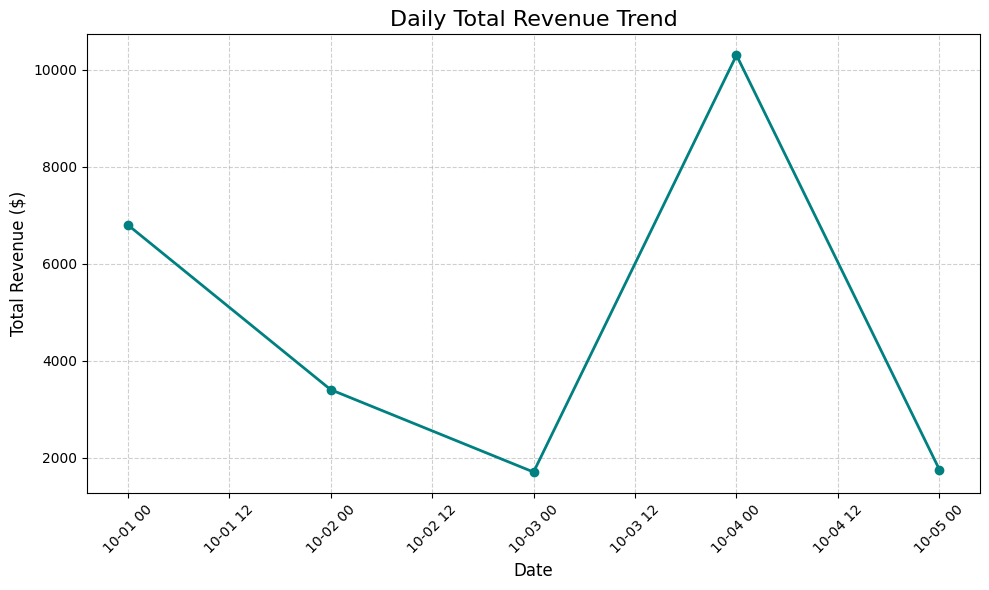

In [8]:
def save_and_print_results(summary_text, daily_revenue):
    # Save the results to the new summary file
    with open(SUMMARY_FILE, 'w') as f:
        f.write(summary_text)

    # Print the insights in a user-friendly format
    print(summary_text)
    print(f"\nResults saved to: {SUMMARY_FILE}")

    # Visualize sales trends
    visualize_trends(daily_revenue)

def visualize_trends(daily_revenue):
    if daily_revenue is not None:
        print("\n--- Visualization ---")

        # Create a figure and axis for the plot
        plt.figure(figsize=(10, 6))
        
        # Plot the daily revenue.
        plt.plot(daily_revenue.index, daily_revenue.values, 
                 marker='o', linestyle='-', color='teal', linewidth=2)
        
        # Add labels and title
        plt.title('Daily Total Revenue Trend', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Total Revenue ($)', fontsize=12)
        
        # Add a grid and format the dates on the x-axis for readability
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(rotation=45)
        plt.tight_layout() # Adjusts plot to prevent labels from overlapping
        
        # Display the plot
        plt.show()

if __name__ == "__main__":
    # The analyze_sales_data function returns the summary text and the daily revenue data
    insights, daily_revenue_data = analyze_sales_data(INPUT_FILE)
    
    if daily_revenue_data is not None:
        save_and_print_results(insights, daily_revenue_data)
    else:
        print(insights) # Print the error message if loading failed
